In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
import torch

print(torch.__version__)

1.11.0


In [2]:
df = pd.read_csv('/home/is/shuntaro-o/dev/persons_move_analysis/data/Twitter_Geotaged/Tokyostation_3zi_2021to2022_576days_test.csv')

In [3]:
df

,Unnamed: 0,text,created_at,retweets,replies,likes,quote_count,place_id,author_id,username,author_followers,author_tweets,author_description,author_location
0,0,Tokyo Japanに写真を投稿しましたhttps://t.co/y5YrtcrvK2,2021-01-31_23:56:50,0.0,0.0,0.0,0.0,735b6f2b933efaf6,7.547264e+07,hiraPhotoTokyo,2508.0,246462.0,①東京・神奈川でカメラマン活動中♫ #被写体募集 →募集要項:https://t.co/8U...,神奈川県川崎市高津区
1,1,I'm at 東海道新幹線 東京駅 in 千代田区 東京都 https://t.co/EDY...,2021-01-31_23:44:42,0.0,0.0,0.0,0.0,28b9063fdce43645,4.349604e+08,Sh___21s,815.0,81414.0,””良い””ものを良いと言いたい,NaN
2,2,東京駅に到着。さあ、明日はお中元の撮影だぜ。 https://t.co/yg1ItqxO0h,2021-01-31_23:39:22,4.0,0.0,53.0,1.0,NaN,1.278250e+09,wagashibuyer,25278.0,38528.0,髙島屋全店と47都道府県全ての和菓子を担当する和菓子バイヤー。バレンタイン生まれ。全国各地の...,日本
3,3,I'm at 東西線 日本橋駅 - @t_line_info in 中央区 東京都 http...,2021-01-31_23:21:00,0.0,0.0,0.0,0.0,735b6f2b933efaf6,5.337914e+08,shoya0103,588.0,60670.0,山﨑天さん。Official髭男dism。千葉ロッテマリーンズ。アルバロモラタ、セルジュニャ...,齊藤会のケツ持ち
4,4,I'm at JR 東京駅 - @jreast_official in 千代田区 東京都 h...,2021-01-31_22:58:46,0.0,0.0,0.0,0.0,28b9063fdce43645,1.041315e+08,battleheater,963.0,139548.0,鉄オタでブシロードの犬🐶三森すずこさんと尾崎由香さんのファン鉄道の話題は鉄道垢(@battl...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,5523,さあ帰ろう。あの頃の日本へ https://t.co/683FuTusuT,2021-01-01_00:09:10,0.0,0.0,0.0,0.0,NaN,7.814944e+07,Koringo_jp,3098.0,384042.0,スポーツ系マスコットキャラクターとご当地キャラ大好き！ カパル親善大使 124番 土偶名マン...,世界文化遺産と東京2020有観客開催の町 小山町
5641,5524,明けましておめでとうございます!!! From everyone at @bosscoop_...,2021-01-01_00:05:36,0.0,0.0,0.0,0.0,735b6f2b933efaf6,1.298415e+18,BosscoopJ,11.0,58.0,PETボトルにぴったり。 BOSSCOOPを使えば、無駄にせず簡単に入れることができる。...,Tokyo-to Japan
5642,5525,今年初撮り📷#令和3年 #今年もよろしく #初撮り #にゃんこ #にゃんすたぐらむ #メス ...,2021-01-01_00:04:37,0.0,0.0,0.0,0.0,735b6f2b933efaf6,7.351536e+17,risa3432,20.0,661.0,2022.03.30💍 #職業 #介護福祉士(第30回合格) #グルホ経験 #有料経験 #特...,NaN
5643,5526,新年あけましておめでとうございますｗｗｗデレステでプラチナオーディションガシャ1日1回10連...,2021-01-01_00:03:26,0.0,0.0,1.0,0.0,NaN,1.448382e+08,kobamasa1984,1413.0,79460.0,意識低い炎上淫夢語録発言ご容赦。38歳未婚低収入彼女彼氏なし限界アイマスPデレステ：3617...,東京都杉並区


In [4]:
day_list = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
hour_list = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']

In [6]:
df["created_at"]=df["created_at"].astype(str)
created_time=df.created_at.values
creatid_at_day_list = []
creatid_at_hour_list = []
for i in created_time:
    creatid_at_day_list.append(i[8:10])
    creatid_at_hour_list.append(i[11:13])
creatid_at_day_list = pd.Series(creatid_at_day_list)
creatid_at_hour_list = pd.Series(creatid_at_hour_list)
df=pd.concat([df,creatid_at_day_list],axis=1)
df=df.rename(columns={0: 'creatid_at_day'})
df=pd.concat([df,creatid_at_hour_list],axis=1)
df=df.rename(columns={0: 'creatid_at_hour'})

In [8]:
df = df[df['creatid_at_day'].isin(day_list)]
df = df[df['creatid_at_hour'].isin(hour_list)]

In [9]:
df['created_at'] = pd.to_datetime(df['created_at'],format="%Y-%m-%d_%H:%M:%S")
df = df.dropna(subset=['created_at'])

In [25]:
list_num = []
for day in day_list:
    for hour in hour_list:
        df_oneday = df[df['creatid_at_day']==day]
        num = len(df_oneday[df_oneday['creatid_at_hour']==hour])
        list_num.append(num)

In [39]:
max(list_num)
index = list_num.index(max(list_num))

In [40]:
index

459

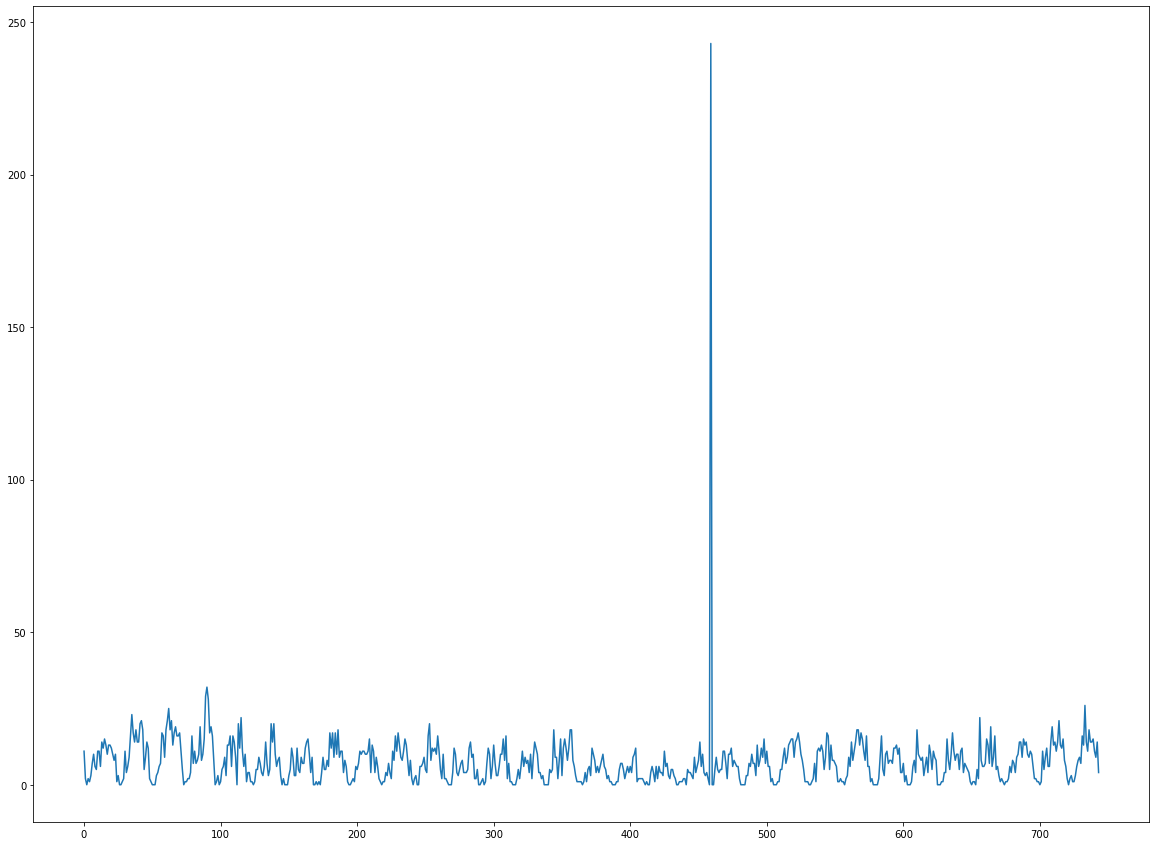

In [33]:
plt.figure(figsize=(20,15))
plt.plot(list_num)

In [46]:
tmp = df[df['creatid_at_day']=='20']

In [47]:
tmp

,Unnamed: 0,text,created_at,retweets,replies,likes,quote_count,place_id,author_id,username,author_followers,author_tweets,author_description,author_location,creatid_at_day,creatid_at_hour
1999,1961,オタクの夜は遅い本日2回目の東京駅(震え声)…うどんまみれになってやる！ https://t...,2021-01-20 23:53:15,0.0,2.0,41.0,0.0,NaN,8.403905e+17,wildfuckinopen,1172.0,33387.0,ロック・メタル＆パンクは子守唄 BiS初代・2期・3期のオールタイム研究員「BiSの概念｣の...,限りなく埼玉寄りの東京(栃木のDNA有),20,23
2000,1962,Tokyo Japanに写真を投稿しましたhttps://t.co/StnpWszY6F,2021-01-20 23:41:16,0.0,0.0,0.0,0.0,735b6f2b933efaf6,7.211479e+17,hinasenarena,18.0,842.0,NaN,NaN,20,23
2001,1963,俺たちtriple-y戦士💖💖💖🪖🪖💖 場所: Tokyo Japan https://t....,2021-01-20 23:24:20,0.0,0.0,0.0,0.0,735b6f2b933efaf6,3.062403e+08,masafumifukui,64.0,1939.0,59歳で転職 外壁工事志銀建設 見習い営業責任者 夢は安藤忠雄先生に営業すること365日24...,日本 東京,20,23
2002,1964,Tokyo Japanに写真を投稿しましたhttps://t.co/3viT252kiQ,2021-01-20 23:22:04,0.0,0.0,0.0,0.0,735b6f2b933efaf6,8.151928e+07,mshrnnk,144.0,3323.0,遊んでばかりいます。 人生100年時代。アラフォー、アラフィフ、アラ還も子供のように遊びまし...,勝どき,20,23
2003,1965,東京フォーラムの飲み屋さんです。ここも光溢れて綺麗でした。😭😭😭✌️ 場所: 800 Deg...,2021-01-20 23:19:43,0.0,0.0,0.0,0.0,28b9063fdce43645,1.003931e+18,taka8766,4.0,3318.0,NaN,NaN,20,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2379,2334,好き〜〜〜！ 場所: Tokyo Japan https://t.co/VUHq2bVog5,2021-01-20 01:19:26,0.0,0.0,0.0,0.0,735b6f2b933efaf6,6.809818e+07,kaijiman,1329.0,10288.0,ポッドキャストパーソナリティ│SNSコンサル・代行│深夜ラジオ構成作家│ウェブディレクター│...,チーム付け焼き刃の中の人,20,01
2380,2335,snap instagram #散歩ついでに久々に #焼きいもや 見たそういやチャルメラも...,2021-01-20 00:35:00,0.0,0.0,2.0,0.0,735b6f2b933efaf6,6.358769e+08,jlgosaka,413.0,5022.0,プリンスではない が・・ゴダール監督や小津安二郎監督への憧れ「街✕時✕人」で写真撮ってる。...,osaka-city +Tokyo,20,00
2381,2336,東京0:35発 中央線快速終電 武蔵小金井行き2455T T5編成緊急事態宣言が終わっても終...,2021-01-20 00:33:30,0.0,1.0,25.0,1.0,NaN,6.023053e+08,shi3pu10,2094.0,35950.0,新駅開業1番きっぷに情熱を注ぐ全駅勢駅メモラー🚃乗った列車や食べ物の記録など🍜大人しくない休...,武蔵小金井,20,00
2382,2337,Tokyo Japanに写真を投稿しましたhttps://t.co/uOr5GSf1Iz,2021-01-20 00:12:54,0.0,0.0,0.0,0.0,735b6f2b933efaf6,2.154977e+09,hitoen9,143.0,2157.0,Japanese/HBP surgeon/Assistant professor of @z...,Japan,20,00
